In [17]:
import numpy as np  # http://www.numpy.org
import matplotlib.pyplot as plt   # http://matplotlib.org
import math as M
from scipy.optimize import fsolve

# Simple, conceptual model of marginal sea

In [18]:
############ Initilisation #################
############################################

#### Constants #####
L_x = 1e6          # [m] zonal extent 
L_y = 2e6          # [m] meridional extent 
A = L_x*L_y        # [m^2] surface area of interior 
P = 2*L_x+2*L_y    # [m] Perimeter 

g = 9.81           # [m/s^2] gravitational acceleration 
C_p = 3.994e3        # [J/(kg K)] specific heat capacity of sea water 
c = 0.006          # [] bottom slope coefficient
s = 0.02           # [] average bottom slope around the perimeter of the marginal sea

#### Parameters ####
H = 1000           # [m] sill height 
f_0 = 1.2e-4       # [s^-1] Coriolis parameter 
Gamma = 20         # [W/(m^2 C)] Restoring strength 
alpha_T = 0.2      # [kg m^-3 C^-1] thermal expansion coefficient; source: Ypma[2020]
alpha_S = 0.8      # [kg m^-3] Haline expansion coefficient 
T_1 = 8.87         # [Celsius] ingoing temperature 
T_A = 2.8          # [Celsius] Atmospheric temperature 
ro = 1028          # [kg m^-3] density sea water 
S = 35             # [ppt] net evaporation minus precipitation
S_1 = 35.2         # [g kg^-1] incoming salinity; source Lambert                          ! is ppt = g kg^-1 ???
E = -2e-8          # [m/s] a representative ocean salinity; source: Spall[2015]

#### functions ####
L = H/s           # [m] width of sloping topography of the boundary current 
#L = 75e3

In [19]:
############# Computation ##################
############################################

# Main equations

def main(x): # function with seven unkowns:  T_0,  T_2,  S_0,  S_2,  V_1, T_eddy, S_eddy 
             #                              x[0], x[1], x[2], x[3], x[4],   x[5],   x[6]
    return [P*H*x[5]-A*Gamma*(x[0]-T_A)/(ro*C_p),
            P*H*x[6]+A*E*S,
            (T_1-x[1])*x[4]*H*L-(x[0] - T_A + (P*L/A)*(T_1-T_A))*A*Gamma/(ro*C_p),
            (S_1-x[3])*x[4]*H*L+E*A*S+P*L*E*S,
            g*H/(2*ro*f_0*L)*(alpha_T*(T_1-x[0])-alpha_S*(S_1-x[2]))-x[4],
            c*x[4]*(T_1-x[0])-x[5],
            c*x[4]*(S_1-x[2])-x[6]]

[T_0,T_2,S_0,S_2,V_1,T_eddy,S_eddy] = fsolve(main, [1,1,1,1,1,1,1])

In [20]:
[T_0,T_2,S_0,S_2,V_1,T_eddy,S_eddy]

[6.224002138509651,
 6.458278362452684,
 35.08894843551929,
 35.10804930078094,
 0.3501876723572814,
 0.005559574995615423,
 0.00023333333333333333]

In [21]:
#### Follow up computations ####

#Atmospheric heat flux/meridional heat transport at the sill [W/m^2]
Q_star = A*(T_0 - T_A)*Gamma + P*L*Gamma*(T_1-T_A)

#Fraction of outflowing waters that include inflowing water [-]
Delta = (T_2-T_0)/(T_1-T_0)

#Downwelling/Medidional overturning strength at the sill [m^2/s]
#W = alpha_T*(g*H**2*(T_1-T_0)*(1-Delta))/(4*ro_0*f_0)


In [22]:
print('V_1=', "{:.2e}".format(V_1), ', Q_star=', "{:.2e}".format(Q_star))#, ', W=', "{:.2e}".format(W))

V_1= 3.50e-01 , Q_star= 1.73e+14


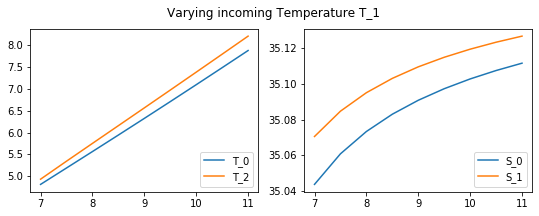

<Figure size 432x288 with 0 Axes>

In [23]:
T_1_array = [7,7.5,8,8.5,9,9.5,10,10.5,11]
T_0 = np.zeros(len(T_1_array))
T_2 = np.zeros(len(T_1_array))
S_0 = np.zeros(len(T_1_array))
S_2 = np.zeros(len(T_1_array))

for i in range(len(T_1_array)):
    T_1=T_1_array[i]
    def main(x): # function with seven unkowns:  T_0,  T_2,  S_0,  S_2,  V_1, T_eddy, S_eddy 
             #                              x[0], x[1], x[2], x[3], x[4],   x[5],   x[6]
        return [P*H*x[5]-A*Gamma*(x[0]-T_A)/(ro*C_p),
            P*H*x[6]+A*E*S,
            (T_1-x[1])*x[4]*H*L-(x[0] - T_A + (P*L/A)*(T_1-T_A))*A*Gamma/(ro*C_p),
            (S_1-x[3])*x[4]*H*L+E*A*S+P*L*E*S,
            g*H/(2*ro*f_0*L)*(alpha_T*(T_1-x[0])-alpha_S*(S_1-x[2]))-x[4],
            c*x[4]*(T_1-x[0])-x[5],
            c*x[4]*(S_1-x[2])-x[6]]
    [T_0[i],T_2[i],S_0[i],S_2[i],V_1,T_eddy,S_eddy] = fsolve(main, [1,1,1,1,1,1,1])

plt.figure(figsize=(9, 3))

plt.subplot(121)
plt.plot(T_1_array, T_0, label='T_0')
plt.plot(T_1_array, T_2, label='T_2')
plt.legend(loc='lower right')
plt.subplot(122)
plt.plot(T_1_array, S_0, label='S_0')
plt.plot(T_1_array, S_2, label='S_1')
plt.legend(loc='lower right')
plt.suptitle('Varying incoming Temperature T_1')
plt.show()
plt.savefig('varyingT_1.png')

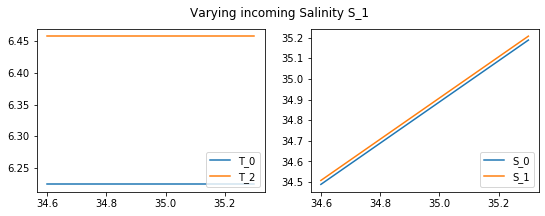

<Figure size 432x288 with 0 Axes>

In [24]:
T_1 = 8.87

S_1_array = np.linspace(34.6,35.3,100)
T_0 = np.zeros(len(S_1_array))
T_2 = np.zeros(len(S_1_array))
S_0 = np.zeros(len(S_1_array))
S_2 = np.zeros(len(S_1_array))

for i in range(len(S_1_array)):
    S_1=S_1_array[i]
    def main(x): # function with seven unkowns:  T_0,  T_2,  S_0,  S_2,  V_1, T_eddy, S_eddy 
             #                              x[0], x[1], x[2], x[3], x[4],   x[5],   x[6]
        return [P*H*x[5]-A*Gamma*(x[0]-T_A)/(ro*C_p),
            P*H*x[6]+A*E*S,
            (T_1-x[1])*x[4]*H*L-(x[0] - T_A + (P*L/A)*(T_1-T_A))*A*Gamma/(ro*C_p),
            (S_1-x[3])*x[4]*H*L+E*A*S+P*L*E*S,
            g*H/(2*ro*f_0*L)*(alpha_T*(T_1-x[0])-alpha_S*(S_1-x[2]))-x[4],
            c*x[4]*(T_1-x[0])-x[5],
            c*x[4]*(S_1-x[2])-x[6]]
    [T_0[i],T_2[i],S_0[i],S_2[i],V_1,T_eddy,S_eddy] = fsolve(main, [1,1,1,1,1,1,1])

plt.figure(figsize=(9, 3))

plt.subplot(121)
plt.plot(S_1_array, T_0, label='T_0')
plt.plot(S_1_array, T_2, label='T_2')
plt.legend(loc='lower right')
plt.subplot(122)
plt.plot(S_1_array, S_0, label='S_0')
plt.plot(S_1_array, S_2, label='S_1')
plt.legend(loc='lower right')
plt.suptitle('Varying incoming Salinity S_1')
plt.show()
plt.savefig('varyingS_1.png')

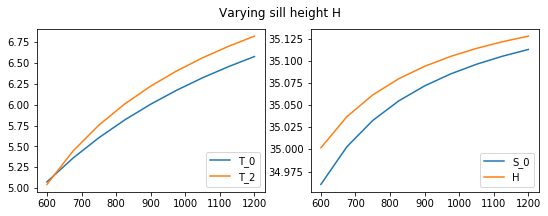

<Figure size 432x288 with 0 Axes>

In [25]:
T_1 = 8.87
S_1 = 35.2

H_array = np.linspace(600,1200,9)
T_0 = np.zeros(len(H_array))
T_2 = np.zeros(len(H_array))
S_0 = np.zeros(len(H_array))
S_2 = np.zeros(len(H_array))

for i in range(len(H_array)):
    H=H_array[i]
    def main(x): # function with seven unkowns:  T_0,  T_2,  S_0,  S_2,  V_1, T_eddy, S_eddy 
             #                              x[0], x[1], x[2], x[3], x[4],   x[5],   x[6]
        return [P*H*x[5]-A*Gamma*(x[0]-T_A)/(ro*C_p),
            P*H*x[6]+A*E*S,
            (T_1-x[1])*x[4]*H*L-(x[0] - T_A + (P*L/A)*(T_1-T_A))*A*Gamma/(ro*C_p),
            (S_1-x[3])*x[4]*H*L+E*A*S+P*L*E*S,
            g*H/(2*ro*f_0*L)*(alpha_T*(T_1-x[0])-alpha_S*(S_1-x[2]))-x[4],
            c*x[4]*(T_1-x[0])-x[5],
            c*x[4]*(S_1-x[2])-x[6]]
    [T_0[i],T_2[i],S_0[i],S_2[i],V_1,T_eddy,S_eddy] = fsolve(main, [1,1,1,1,1,1,1])

plt.figure(figsize=(9, 3))

plt.subplot(121)
plt.plot(H_array, T_0, label='T_0')
plt.plot(H_array, T_2, label='T_2')
plt.legend(loc='lower right')
plt.subplot(122)
plt.plot(H_array, S_0, label='S_0')
plt.plot(H_array, S_2, label='H')
plt.legend(loc='lower right')
plt.suptitle('Varying sill height H')
plt.show()
plt.savefig('varyingH.png')

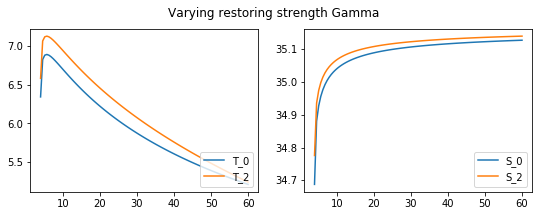

<Figure size 432x288 with 0 Axes>

In [26]:
T_1 = 8.87
S_1 = 35.2
H = 1000

Gamma_array = np.linspace(4,60,100)
T_0 = np.zeros(len(Gamma_array))
T_2 = np.zeros(len(Gamma_array))
S_0 = np.zeros(len(Gamma_array))
S_2 = np.zeros(len(Gamma_array))

for i in range(len(Gamma_array)):
    Gamma=Gamma_array[i]
    def main(x): # function with seven unkowns:  T_0,  T_2,  S_0,  S_2,  V_1, T_eddy, S_eddy 
             #                              x[0], x[1], x[2], x[3], x[4],   x[5],   x[6]
        return [P*H*x[5]-A*Gamma*(x[0]-T_A)/(ro*C_p),
            P*H*x[6]+A*E*S,
            (T_1-x[1])*x[4]*H*L-(x[0] - T_A + (P*L/A)*(T_1-T_A))*A*Gamma/(ro*C_p),
            (S_1-x[3])*x[4]*H*L+E*A*S+P*L*E*S,
            g*H/(2*ro*f_0*L)*(alpha_T*(T_1-x[0])-alpha_S*(S_1-x[2]))-x[4],
            c*x[4]*(T_1-x[0])-x[5],
            c*x[4]*(S_1-x[2])-x[6]]
    [T_0[i],T_2[i],S_0[i],S_2[i],V_1,T_eddy,S_eddy] = fsolve(main, [1,1,1,1,1,1,1])

plt.figure(figsize=(9, 3))

plt.subplot(121)
plt.plot(Gamma_array, T_0, label='T_0')
plt.plot(Gamma_array, T_2, label='T_2')
plt.legend(loc='lower right')
plt.subplot(122)
plt.plot(Gamma_array, S_0, label='S_0')
plt.plot(Gamma_array, S_2, label='S_2')
plt.legend(loc='lower right')
plt.suptitle('Varying restoring strength Gamma')
plt.show()
plt.savefig('varyingGamma.png')

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

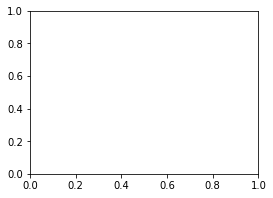

In [28]:
T_1 = 8.87
S_1 = 35.2
H = 1000
Gamma = 20

E_array = np.linspace(0,4,100)
T_0 = np.zeros(len(E_array))
T_2 = np.zeros(len(E_array))
S_0 = np.zeros(len(E_array))
S_2 = np.zeros(len(E_array))

for i in range(len(E_array)):
    E=E_array[i]
    def main(x): # function with seven unkowns:  T_0,  T_2,  S_0,  S_2,  V_1, T_eddy, S_eddy 
             #                              x[0], x[1], x[2], x[3], x[4],   x[5],   x[6]
        return [P*H*x[5]-A*Gamma*(x[0]-T_A)/(ro*C_p),
            P*H*x[6]+A*E*S,
            (T_1-x[1])*x[4]*H*L-(x[0] - T_A + (P*L/A)*(T_1-T_A))*A*Gamma/(ro*C_p),
            (S_1-x[3])*x[4]*H*L+E*A*S+P*L*E*S,
            g*H/(2*ro*f_0*L)*(alpha_T*(T_1-x[0])-alpha_S*(S_1-x[2]))-x[4],
            c*x[4]*(T_1-x[0])-x[5],
            c*x[4]*(S_1-x[2])-x[6]]
    [T_0,T_2,S_0,S_2,V_1,T_eddy,S_eddy] = fsolve(main, [1,1,1,1,1,1,1])
    
plt.figure(figsize=(9, 3))

plt.subplot(121)
plt.plot(E_array, T_0, label='T_0')
plt.plot(E_array, T_2, label='T_2')
plt.legend(loc='lower right')
plt.subplot(122)
plt.plot(E_array, S_0, label='S_0')
plt.plot(E_array, S_2, label='S_1')
plt.legend(loc='lower right')
plt.suptitle('Varying incoming Precipitation E')
plt.show()
plt.savefig('varyingE.png')